In [ ]:
### 4C16 Lab 4 - Feedforward Neural Nets for Image Classification.

In [4]:
# Import the necessary modules

import keras
from keras import datasets
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.regularizers import l2

from keras.models import model_from_json

from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

import pickle
import sklearn as skl

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [5]:
# Define some useful functions
class PlotLossAccuracy(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.acc = []
        self.losses = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(int(self.i))
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(16, 6))
        plt.plot([1, 2])
        plt.subplot(121) 
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="validation loss")
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('Model Loss')
        plt.legend()
        plt.subplot(122)         
        plt.plot(self.x, self.acc, label="training accuracy")
        plt.plot(self.x, self.val_acc, label="validation accuracy")
        plt.legend()
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.title('Model Accuracy')
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show();
        
def save_model_to_disk():    
    # save model and weights (don't change the filenames)
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to model.json and weights to model.h5")

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


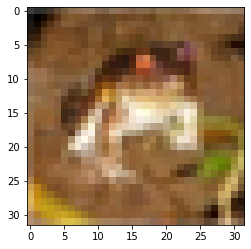

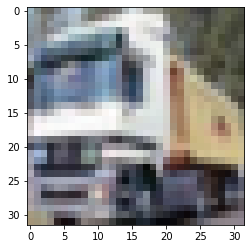

In [20]:
# print('loading the dataset...')

# def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
#     with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
#         # note the encoding type is 'latin1'
#         batch = pickle.load(file, encoding='latin1')      
#     features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
#     labels = batch['labels']
#     return features, labels


# def load_label_names():
#     return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# print('let\'s look at some of the pictures and their ground truth labels:')
from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


X_train = X_train/255
X_test = X_test/255
Y_train = keras.utils.to_categorical(Y_train,10)
Y_test = keras.utils.to_categorical(Y_test,10)

In [ ]:
# # let's split data between validation set and training set
# # 
# X_train, X_validation, Y_train, Y_validation = skl.model_selection.train_test_split(X, Y, test_size=.1, random_state=0)

In [21]:
# the data structure is a tensor, ie. it is a multidimensional array
# each layer instance is callable on a tensor, and returns a tensor
inputs = keras.layers.Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x) # Drop out random 2% to prevent overfitting
x = Dense(800, activation='relu')(x)
x = Dropout(0.3)(x) # Drop out random 25% to prevent overfitting
x = Dense(800, activation='relu')(x)
x = Dropout(0.3)(x) # Drop out random 25% to prevent overfitting
predictions = Dense(10, activation='softmax')(x)

# we create the model 
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.99, nesterov=True)
# opt = keras.optimizers.Adadelta()

# setup the optimisation strategy
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

if (model.count_params() > 10000000):    
    raise("Your model is unecessarily complex, scale down!")
    


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                92190     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 93,430
Trainable params: 93,430
Non-trainable params: 0
_________________________________________________________________


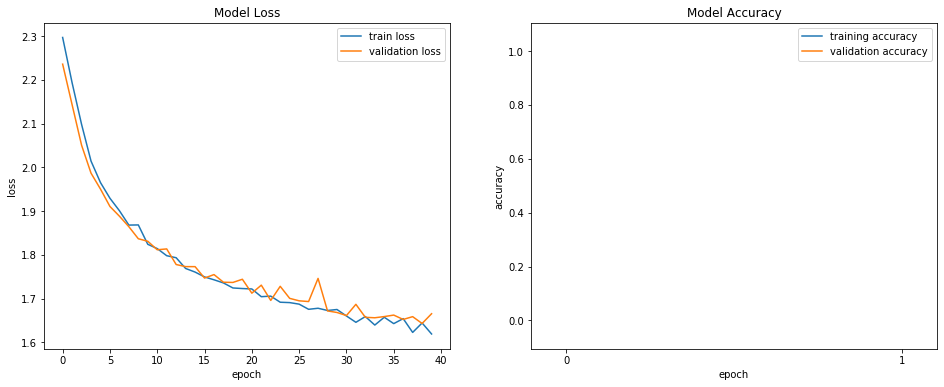

In [23]:
# we create a callback function to plot our loss function and accuracy
pltCallBack = PlotLossAccuracy()

# and train
model.fit(X_train, Y_train,
          batch_size=4096, epochs=40, 
          validation_data=(X_test, Y_test), 
          callbacks=[pltCallBack])


In [ ]:
# write model to model.json and weights to model.h5 for submission

save_model_to_disk()

In [ ]:
# In the terminal, add these files to git and submit the lab
# Do the following: 
#  git add lab-04/model.json
#  git add lab-04/model.h5
#  git commit -m "Added NN model."
#  git push
#  submit-lab 4

In [27]:

from keras.models import Sequential
model = Sequential([
    Flatten(),
    Dense(30,activation='relu'),
    Dropout(0.25),
    Dense(30,activation='relu'),
    Dropout(0.25),
    Dense(10,activation='softmax')    
])
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
if (model.count_params() > 10000000):    
    raise("Your model is unecessarily complex, scale down!")


ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [ ]:
# Question 1: design a network only using Dense layers and achieve 50% accuracy on the server's test set
#
#  Do 'git commit -a -m "model update"' followed by 'submit-lab 4' to check your solution.
#
inputs = keras.layers.Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(30, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(30, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=inputs, outputs=predictions)

opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
if (model.count_params() > 10000000):    
    raise("Your model is unecessarily complex, scale down!")

model.fit(X_train, Y_train,
          batch_size=4096, epochs=40, 
          validation_data=(X_validation, Y_validation), 
          callbacks=[pltCallBack])
save_model_to_disk()


#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
#     model.add(Activation('relu'))
#     model.add(Conv2D(32,(3, 3)))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))


In [ ]:
# Question 2: design a network using Dense layers and achieve 55% accuracy on the server's test set
inputs = keras.layers.Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(30, activation='relu')(x)
x = Dense(30, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=inputs, outputs=predictions)


opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
if (model.count_params() > 10000000):    
    raise("Your model is unecessarily complex, scale down!")

model.fit(X_train, Y_train,
          batch_size=4096, epochs=40, 
          validation_data=(X_validation, Y_validation), 
          callbacks=[pltCallBack])
save_model_to_disk()


# Change the architecture: 
#   1. for instance you may want to add layers, 
#   2. change the number of units per layer, 
#   3. change the activation functions
#   4. drop out and refularisers
#   5. learning rate
# Always check on your accuray and loss graphs that that you are not overfitting. 
# Optimiser. You may get faster convergence using different optimiser that rmsprop (but rmsprop is not bad)

